Files already downloaded and verified
Files already downloaded and verified
Epoch [1/10], Loss: 1.4379, Accuracy: 47.41%
Epoch [2/10], Loss: 1.0619, Accuracy: 62.90%
Epoch [3/10], Loss: 0.9092, Accuracy: 68.59%
Epoch [4/10], Loss: 0.8137, Accuracy: 72.24%
Epoch [5/10], Loss: 0.7378, Accuracy: 74.89%
Epoch [6/10], Loss: 0.6782, Accuracy: 76.95%
Epoch [7/10], Loss: 0.6227, Accuracy: 78.77%
Epoch [8/10], Loss: 0.5716, Accuracy: 80.75%
Epoch [9/10], Loss: 0.5247, Accuracy: 82.17%
Epoch [10/10], Loss: 0.4908, Accuracy: 83.26%
Accuracy of the model on the 10000 test images: 76.73%


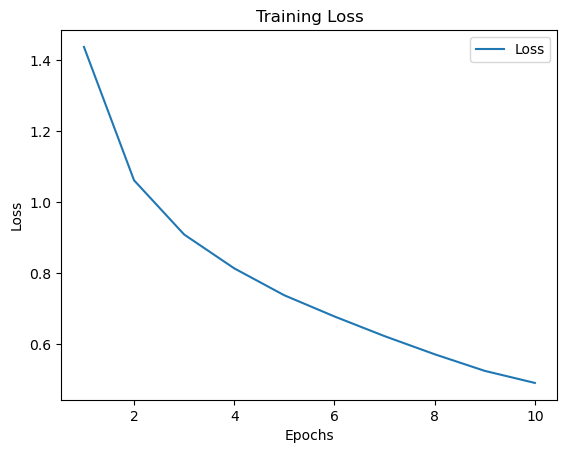

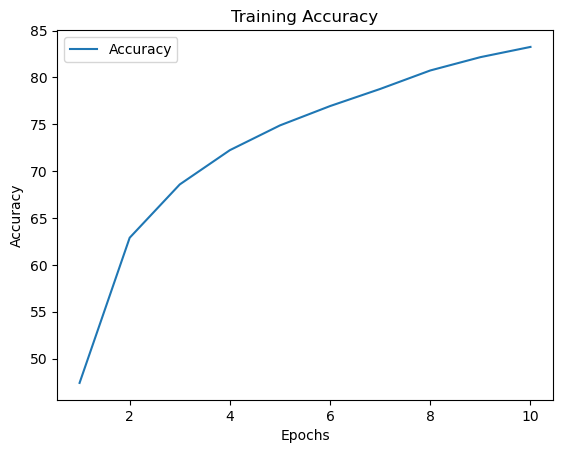

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
 
# TODO:解释参数含义，在?处填入合适的参数
batch_size = 64 #batch size 对于gpu一般是2的倍数这里选择64
learning_rate = 0.001 # 一般的学习率都定为0.001不好再调整
num_epochs = 10
 
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
 
# root可以换为你自己的路径
trainset = torchvision.datasets.CIFAR10(root='D:/Dataset/CIFAR-10', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
 
testset = torchvision.datasets.CIFAR10(root='D:/Dataset/CIFAR-10', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)
#检测一下数据，没问题就加注释了
#trainset_size=len(trainset)
#testset_size=len(testset)
#print(f'{trainset_size}')
#print(f'{testset_size}')

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        # TODO:这里补全你的网络层
        self.conv1=nn.Conv2d(3,16,3,padding=1)#三个参数分别为输入通道数，输出通道数和卷积核的尺寸，padding让结果和初始输入的尺寸相同
        self.bn1 = nn.BatchNorm2d(16)#进行批归一化
        self.conv2=nn.Conv2d(16,32,3,padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3=nn.Conv2d(32,64,3,padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4=nn.Conv2d(64,128,3,padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.pool=nn.MaxPool2d(2,2)
        self.fc1=nn.Linear(128*2*2,512)
        self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,10)
        
        self.dropout = nn.Dropout(0.5)
    def forward(self, x):
        # TODO:这里补全你的前向传播
        x=self.pool(F.relu(self.bn1(self.conv1(x))))
        x=self.pool(F.relu(self.bn2(self.conv2(x))))
        x=self.pool(F.relu(self.bn3(self.conv3(x))))
        x=self.pool(F.relu(self.bn4(self.conv4(x))))
        x=x.view(-1,128*2*2)
        x=F.relu(self.fc1(x))
        x=self.dropout(x)
        x=F.relu(self.fc2(x))
        x=self.dropout(x)
        x=self.fc3(x)
        return x
        
 
# TODO:补全
model = Network().to(device)
 
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

losses = []
accuracies = []

def train():
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
 
            optimizer.zero_grad()
 
            outputs = model(inputs)
            loss = criterion(outputs, labels)
 
            loss.backward()
            optimizer.step()
           
            running_loss += loss.item()
 
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        avg_loss = running_loss / len(trainloader)
        accuracy = 100 * correct / total
        losses.append(avg_loss)
        accuracies.append(accuracy)
       
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(trainloader):.4f}, Accuracy: {accuracy:.2f}%')

epochs = np.arange(1, num_epochs+1)




def test():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
 
    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the 10000 test images: {accuracy:.2f}%')
 
if __name__ == "__main__":
    train()
    test()

# 绘制loss曲线图
plt.figure()
plt.plot(epochs, losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# 绘制accuracy曲线图
plt.figure()
plt.plot(epochs, accuracies, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.show()